# PROYECTO INDIVIDUAL 2 - ACCIDENTES AEREOS

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Raw DataFrame

In [2]:
air_accidents = pd.read_csv('AccidentesAviones.csv')

In [3]:
air_accidents.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [4]:
air_accidents.tail()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [5]:
air_accidents.shape

(5008, 18)

In [6]:
air_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

# Pre-processing

In [7]:
# Drop "unnamed" column
air_accidents = air_accidents.drop(columns=['Unnamed: 0', 'flight_no', 'registration', 'cn_ln'])

In [8]:
# Replace "?" for null values.
air_accidents.replace('?', np.nan, inplace=True)

In [9]:
# Regularize column names
column_name_mapping = {
    'fecha': 'Date',
    'HORA declarada': 'DeclaredTime',
    'Ruta': 'Location',
    'OperadOR': 'Operator',
    'flight_no': 'FlightNumber',
    'route': 'Route',
    'ac_type': 'Aircraft',
    'registration': 'Registration',
    'cn_ln': 'CN_LN',
    'all_aboard': 'TotalOnBoard',
    'PASAJEROS A BORDO': 'PassengersAboard',
    'crew_aboard': 'CrewAboard',
    'cantidad de fallecidos': 'Fatalities',
    'passenger_fatalities': 'PassengerFatalities',
    'crew_fatalities': 'CrewFatalities',
    'ground': 'Ground',
    'summary': 'Summary',    
}

air_accidents = air_accidents.rename(columns=column_name_mapping)

In [10]:
# Change "Date" column values to datetime format
air_accidents["Date"] = pd.to_datetime(air_accidents["Date"], format='%B %d, %Y')

In [11]:
# Change "DeclaredTIme" column to "HH:mm" format
# Convert "HHMM" format to "HH:mm" format
air_accidents['DeclaredTime'] = air_accidents['DeclaredTime'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)
# Convert non-null values to datetime objects in "HH:mm" format
air_accidents['DeclaredTime'] = pd.to_datetime(air_accidents['DeclaredTime'], format='%H:%M', errors='coerce').dt.strftime('%H:%M')

In [12]:
# Replace NaN values in selected columns
air_accidents["Location"].fillna("Not Defined", inplace=True)
air_accidents["Operator"].fillna("Unknown", inplace=True)
air_accidents["Route"].fillna("Not Defined", inplace=True)
air_accidents["Aircraft"].fillna("No Type", inplace=True)
air_accidents["Summary"].fillna("No Comments", inplace=True)

In [13]:
# Replace any non-numeric characters and convert to numeric
# List of columns to convert to integers
int_columns = ['TotalOnBoard', 'PassengersAboard', 'CrewAboard', 'Fatalities', 'PassengerFatalities', 'CrewFatalities', 'Ground']

# Define a default value for NaN (e.g., 0)
default_value = 0

# Loop through each column and convert to integers
for col in int_columns:
    # Fill NaN values with the default value
    air_accidents[col] = air_accidents[col].fillna(default_value).astype(int)

In [14]:
# Regularize "Operator" column values
operator_mapping = {
    'Military - US Air Force': 'Military - U.S. Air Force',
    'Military - U.S. Army Air Forces': 'Military - U.S. Army',
    'Military - US Army Air Forces': 'Military - U.S. Army',
    'Military - US Army Air Force': 'Military - U.S. Army',
    'Military - US Army Air Corps': 'Military - U.S. Army',
    'Military - US Navy': 'Military - U.S. Navy',
    'Military - U.S. Marines': 'Military - U.S. Navy',
    'Military - U.S. Marine Corps': 'Military - U.S. Navy',
    'Military - US Marine Air Corps': 'Military - U.S. Navy',
    'Military -Royal Air Force': 'Military - Royal Air Force'
}

air_accidents['Operator'] = air_accidents['Operator'].replace(operator_mapping)

In [15]:
# Add columns with calculated values
air_accidents["TotalFatalities"] = air_accidents["Fatalities"] + air_accidents["Ground"]
air_accidents['Survived'] = air_accidents['TotalOnBoard'] - air_accidents['Fatalities']
air_accidents["SurvivalRate"] = round(100 * (air_accidents['Survived']) / air_accidents['TotalOnBoard'], 2)
air_accidents["IsMilitary"] = air_accidents['Operator'].str.contains("Military",regex=False)
air_accidents['LocationCountry'] = air_accidents['Location'].str.split(',').str[-1].str.strip()
air_accidents['CrewSurvivors'] = air_accidents['CrewAboard'] - air_accidents['CrewFatalities']
air_accidents["CrewSurvivalRate"] = round(100 * (air_accidents['CrewSurvivors']) / air_accidents['CrewAboard'], 2)

In [16]:
# Create Decade columns for future KPI
air_accidents['2002-2011'] = (air_accidents['Date'].dt.year >= 2002) & (air_accidents['Date'].dt.year <= 2011)
air_accidents['2012-2021'] = (air_accidents['Date'].dt.year >= 2012) & (air_accidents['Date'].dt.year <= 2021)

In [17]:
# Replace state names with "United States" in the "Location Country" column
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
             'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
             'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
             'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
             'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
             'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
             'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

air_accidents['LocationCountry'] = air_accidents['LocationCountry'].replace(us_states, 'United States')

## Clean DataFrame

In [18]:
# Show all the columns in DataFrame
pd.set_option('display.max_columns', None)

In [19]:
air_accidents.head()

,Date,DeclaredTime,Location,Operator,Route,Aircraft,TotalOnBoard,PassengersAboard,CrewAboard,Fatalities,PassengerFatalities,CrewFatalities,Ground,Summary,TotalFatalities,Survived,SurvivalRate,IsMilitary,LocationCountry,CrewSurvivors,CrewSurvivalRate,2002-2011,2012-2021
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1,1,50.0,True,United States,1,100.0,False,False
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1,0,0.0,False,France,1,100.0,False,False
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,5,0,0.0,True,United States,0,0.0,False,False
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,Not Defined,Curtiss seaplane,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1,0,0.0,False,Canada,0,0.0,False,False
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,Not Defined,Zeppelin L-1 (airship),20,0,0,14,0,0,0,The airship flew into a thunderstorm and encou...,14,6,30.0,True,Over the North Sea,0,NaN,False,False


In [20]:
air_accidents.tail()

,Date,DeclaredTime,Location,Operator,Route,Aircraft,TotalOnBoard,PassengersAboard,CrewAboard,Fatalities,PassengerFatalities,CrewFatalities,Ground,Summary,TotalFatalities,Survived,SurvivalRate,IsMilitary,LocationCountry,CrewSurvivors,CrewSurvivalRate,2002-2011,2012-2021
5003,2021-03-28,18:35,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...,5,1,16.67,False,United States,0,0.0,False,True
5004,2021-05-21,18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,Not Defined,Beechcraft B300 King Air 350i,11,7,4,11,7,4,0,"While on final approach, in poor weather condi...",11,0,0.00,True,Nigeria,0,0.0,False,True
5005,2021-06-10,08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,14,12,2,12,11,1,0,The plane was carrying military personnel and ...,12,2,14.29,True,Myanmar,1,50.0,False,True
5006,2021-07-04,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96,88,8,50,0,0,3,"While attempting to land at Jolo Airport, the ...",53,46,47.92,True,Philippines,8,100.0,False,True
5007,2021-07-06,15:00,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...,28,0,0.00,False,Russia,0,0.0,False,True


In [21]:
air_accidents.shape

(5008, 23)

In [22]:
air_accidents.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,5008,1971-05-14 09:57:13.226837072,1908-09-17 00:00:00,1951-05-07 12:00:00,1970-09-02 12:00:00,1992-03-22 12:00:00,2021-07-06 00:00:00,NaN
TotalOnBoard,5008.0,31.015575,0.0,6.0,16.0,34.25,644.0,45.438768
PassengersAboard,5008.0,25.691294,0.0,2.0,11.0,29.0,614.0,43.405075
CrewAboard,5008.0,4.321885,0.0,2.0,3.0,6.0,83.0,3.789422
Fatalities,5008.0,22.258387,0.0,4.0,11.0,25.0,583.0,34.983747
PassengerFatalities,5008.0,18.051917,0.0,0.0,7.0,20.0,560.0,33.496574
CrewFatalities,5008.0,3.41893,0.0,1.0,3.0,5.0,43.0,3.193296
Ground,5008.0,1.703275,0.0,0.0,0.0,0.0,2750.0,55.2514
TotalFatalities,5008.0,23.961661,0.0,4.0,12.0,26.0,2842.0,66.348432
Survived,5008.0,8.757188,-26.0,0.0,0.0,3.0,516.0,30.599407


In [23]:
date_stats = air_accidents['Date'].describe()
print(date_stats)

count                             5008
mean     1971-05-14 09:57:13.226837072
min                1908-09-17 00:00:00
25%                1951-05-07 12:00:00
50%                1970-09-02 12:00:00
75%                1992-03-22 12:00:00
max                2021-07-06 00:00:00
Name: Date, dtype: object


In [24]:
air_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5008 non-null   datetime64[ns]
 1   DeclaredTime         3457 non-null   object        
 2   Location             5008 non-null   object        
 3   Operator             5008 non-null   object        
 4   Route                5008 non-null   object        
 5   Aircraft             5008 non-null   object        
 6   TotalOnBoard         5008 non-null   int32         
 7   PassengersAboard     5008 non-null   int32         
 8   CrewAboard           5008 non-null   int32         
 9   Fatalities           5008 non-null   int32         
 10  PassengerFatalities  5008 non-null   int32         
 11  CrewFatalities       5008 non-null   int32         
 12  Ground               5008 non-null   int32         
 13  Summary              5008 non-nul

In [25]:
# Create new .csv file with cleaned DataFrame
file_path = 'C:\\Users\\HP\\Desktop\\PROYECTOS\\Proyecto Individual 2\\Air_Accidents.csv'
air_accidents.to_csv(file_path, index=False)

# EDA

Accidents Per Year

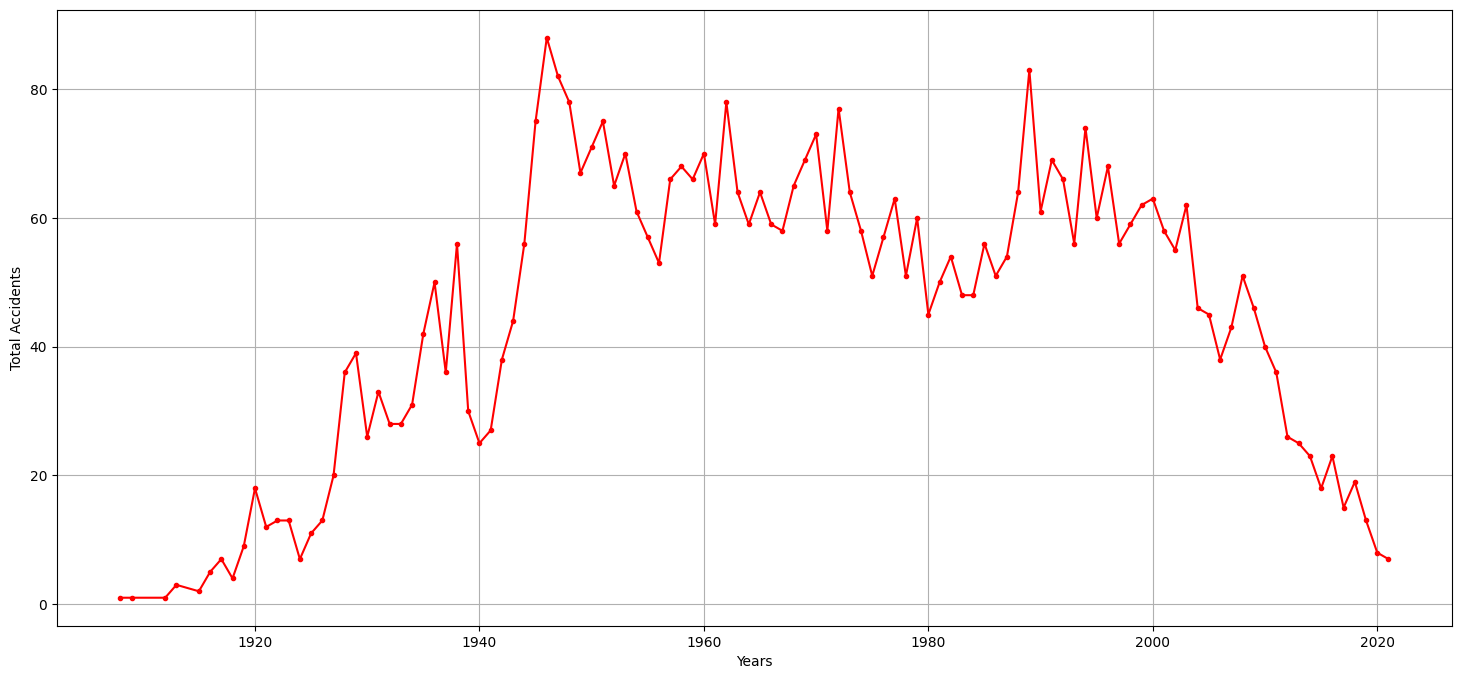

In [26]:
year_count = air_accidents.groupby(air_accidents.Date.dt.year)[['Date']].count()

plt.figure(figsize= (18, 8))
plt.plot(year_count.index, year_count['Date'], marker= '.', color='red')

plt.xlabel('Years')
plt.ylabel('Total Accidents')
plt.grid(True)
plt.show()

Fatalities Per Year

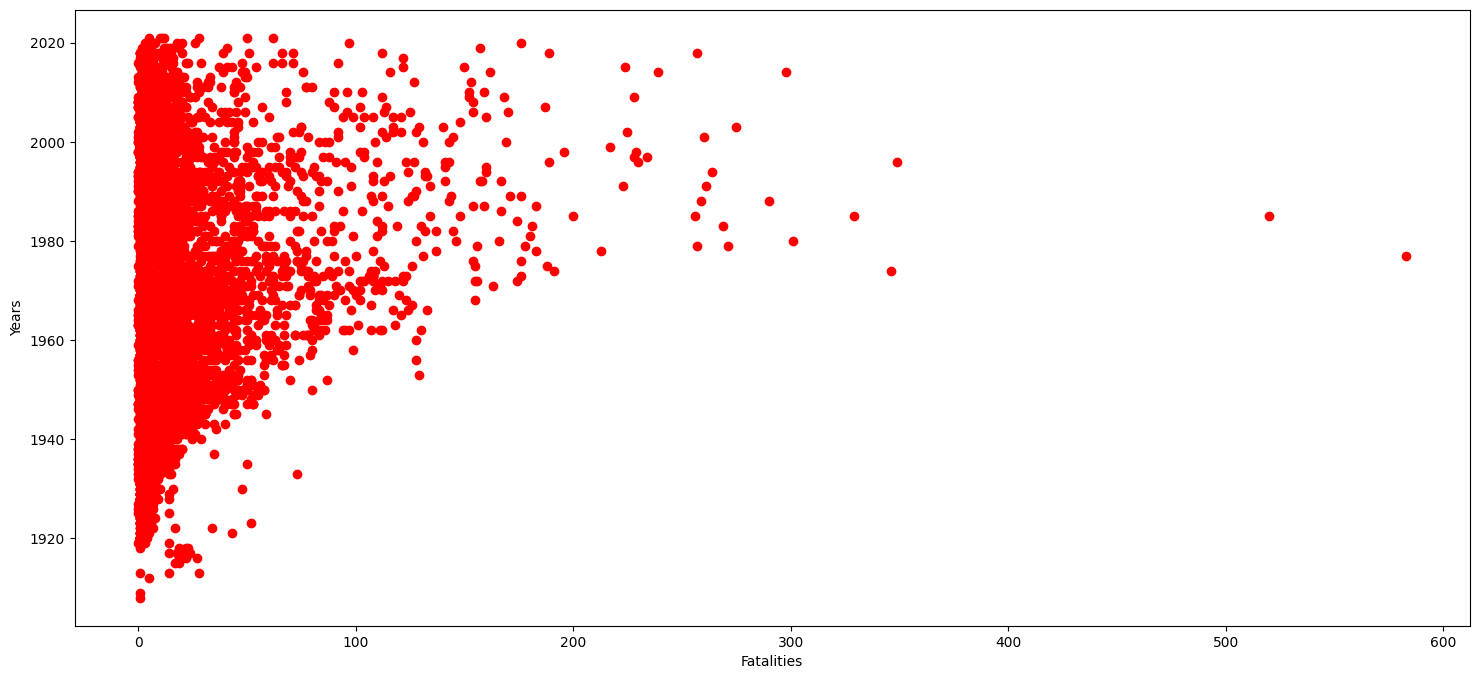

In [27]:
plt.figure(figsize= (18, 8))
years = air_accidents['Date'].dt.year
plt.plot(air_accidents['Fatalities'], years, 'o', color='red')
plt.xlabel('Fatalities')
plt.ylabel('Years')
plt.show()

Military vs. Non-Military Accidents

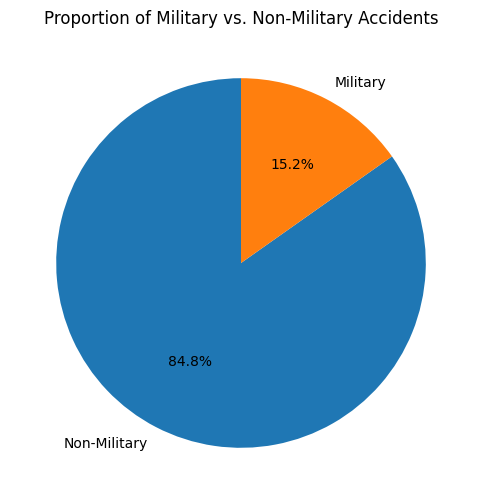

In [28]:
# Count military and non-military accidents
military_count = air_accidents['IsMilitary'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(military_count, labels=['Non-Military', 'Military'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Military vs. Non-Military Accidents')
plt.show()

Non-Military Flight Accidents Per Year

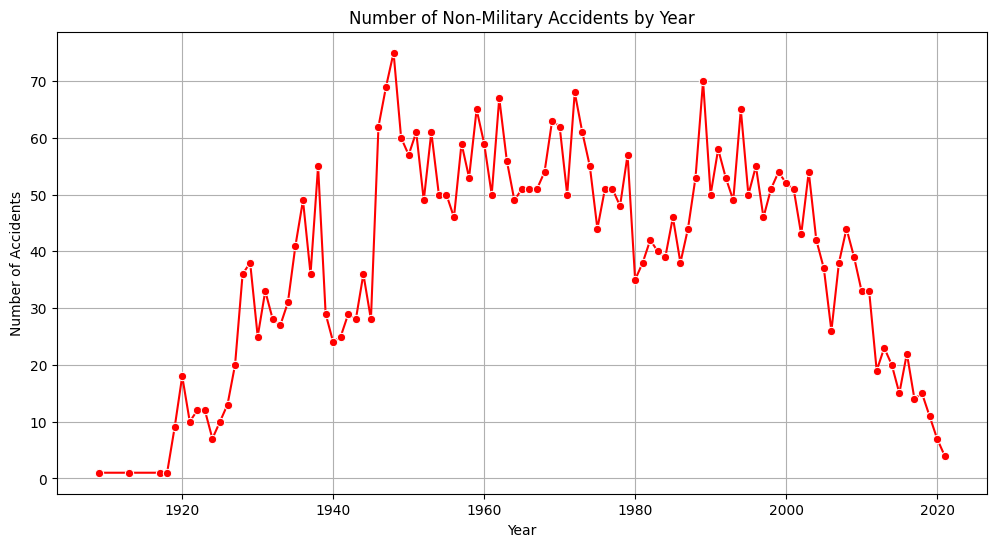

In [29]:
# Only non-military flights
non_military_accidents = air_accidents[air_accidents['IsMilitary'] == False]
non_military_accidents_by_year = non_military_accidents.groupby(non_military_accidents['Date'].dt.year).size()

# Convert the Series to a DataFrame
non_military_accidents_by_year_df = non_military_accidents_by_year.reset_index(name='Count')

# Create a time series plot for non-military accidents
plt.figure(figsize=(12, 6))
sns.lineplot(data=non_military_accidents_by_year_df, x='Date', y='Count', marker='o', color='red')
plt.title('Number of Non-Military Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

Military Flight Accidents Per Year

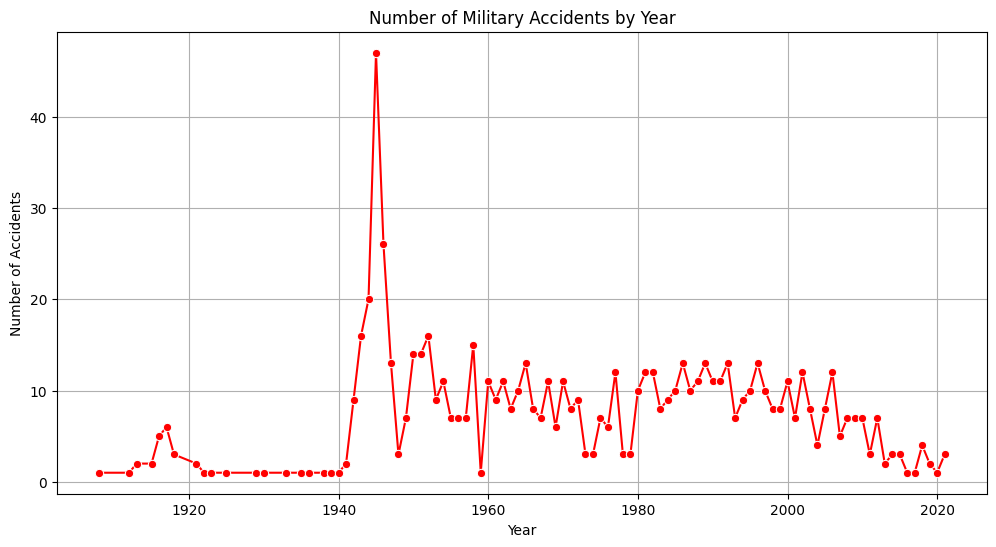

In [30]:
# Only military flights
military_accidents = air_accidents[air_accidents['IsMilitary'] == True]
military_accidents_by_year = military_accidents.groupby(military_accidents['Date'].dt.year)['Date'].count()

# Convert the Series to a DataFrame
military_accidents_by_year_df = military_accidents_by_year.reset_index(name='Count')

# Create a time series plot for military accidents
plt.figure(figsize=(12, 6))
sns.lineplot(data=military_accidents_by_year_df, x='Date', y='Count', marker='o', color='red')
plt.title('Number of Military Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

Most Accidents by Operator (Top 20 - Non-Military)

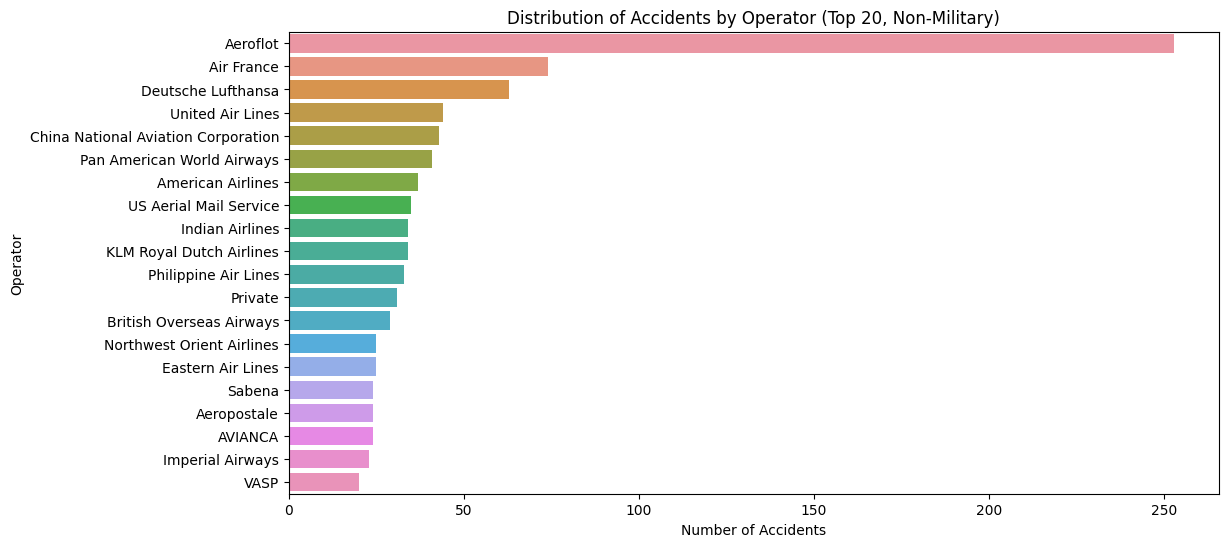

In [31]:
# Top 20 operators with the most accidents (non-military flights)
top_20_operators_non_military = air_accidents[air_accidents['IsMilitary'] == False]['Operator'].value_counts().head(20).index
filtered_data_non_military = air_accidents[(air_accidents['Operator'].isin(top_20_operators_non_military)) & (air_accidents['IsMilitary'] == False)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data_non_military, y='Operator', order=filtered_data_non_military['Operator'].value_counts().index)
plt.title('Distribution of Accidents by Operator (Top 20, Non-Military)')
plt.xlabel('Number of Accidents')
plt.ylabel('Operator')
plt.show()

Most Accidents by Operator (Top 20 - Military)

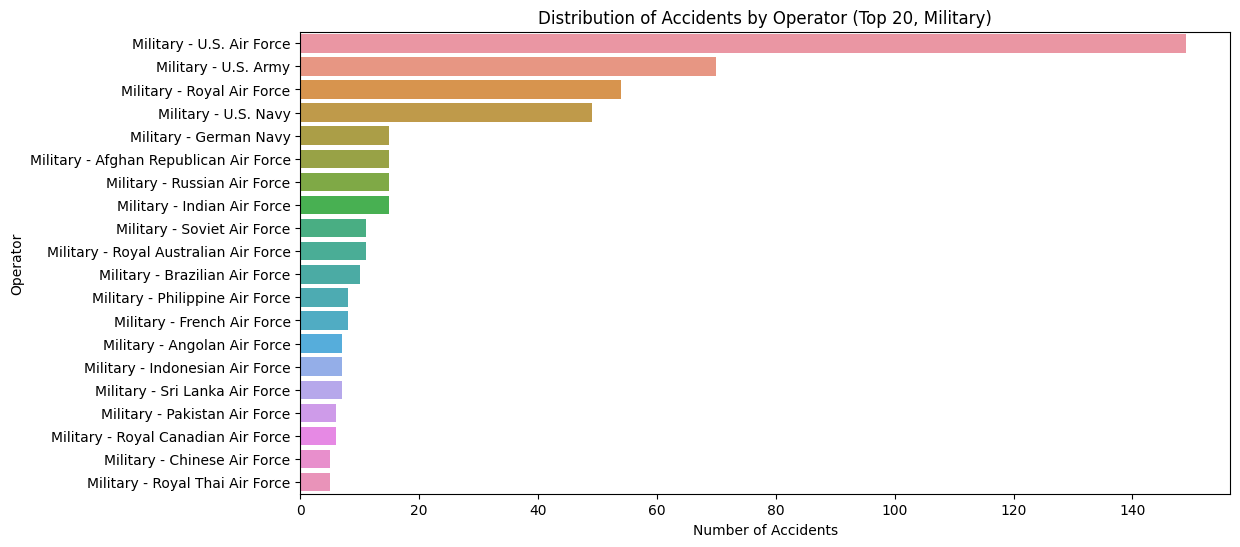

In [32]:
# Top 20 operators with the most accidents (military flights)
top_20_operators_military = air_accidents[air_accidents['IsMilitary'] == True]['Operator'].value_counts().head(20).index
filtered_data_military = air_accidents[(air_accidents['Operator'].isin(top_20_operators_military)) & (air_accidents['IsMilitary'] == True)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data_military, y='Operator', order=filtered_data_military['Operator'].value_counts().index)
plt.title('Distribution of Accidents by Operator (Top 20, Military)')
plt.xlabel('Number of Accidents')
plt.ylabel('Operator')
plt.show()

Correlation between Passengers on Board and Fatalities

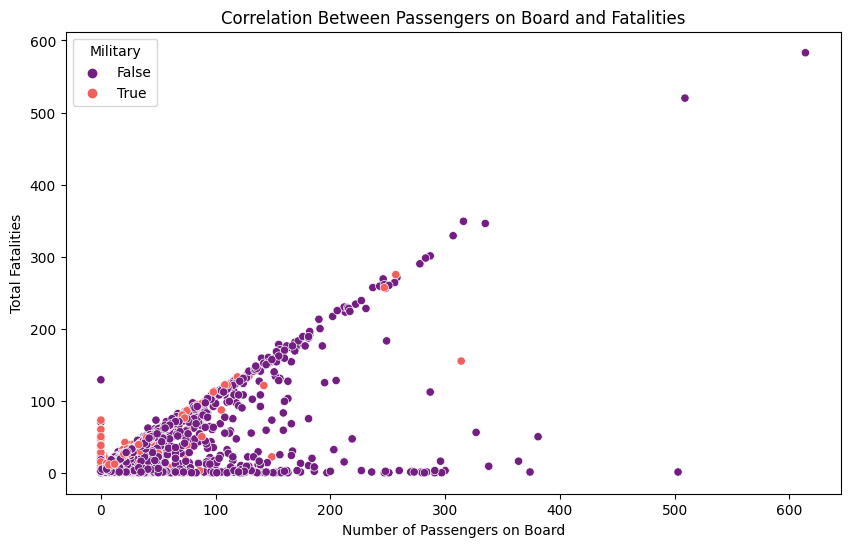

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=air_accidents, x='PassengersAboard', y='Fatalities', hue='IsMilitary', palette='magma')
plt.title('Correlation Between Passengers on Board and Fatalities')
plt.xlabel('Number of Passengers on Board')
plt.ylabel('Total Fatalities')
plt.legend(title='Military')
plt.show()

Survivors vs Fatalities

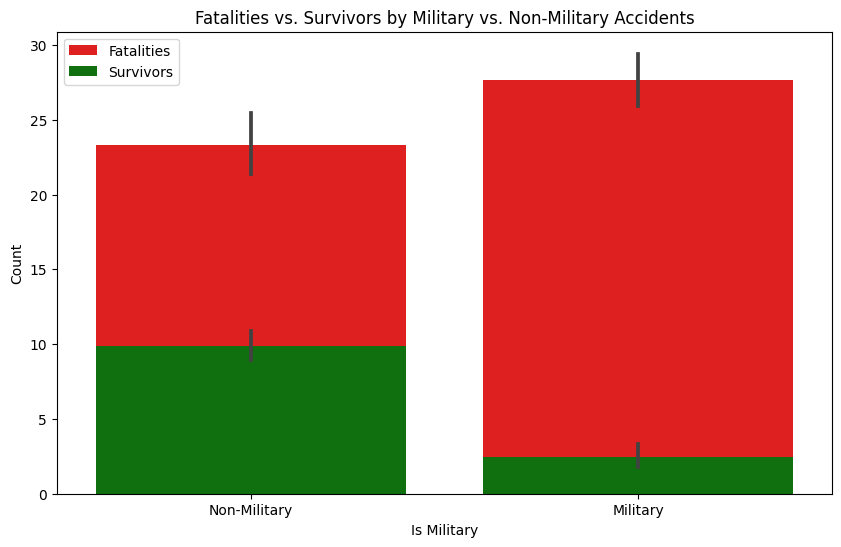

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=air_accidents, x='IsMilitary', y='TotalFatalities', color='red', label='Fatalities')
sns.barplot(data=air_accidents, x='IsMilitary', y='Survived', color='green', label='Survivors')
plt.title('Fatalities vs. Survivors by Military vs. Non-Military Accidents')
plt.xlabel('Is Military')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Military', 'Military'])
plt.legend()
plt.show()

Top 20 Countries with Most Accidents (Non-Military)

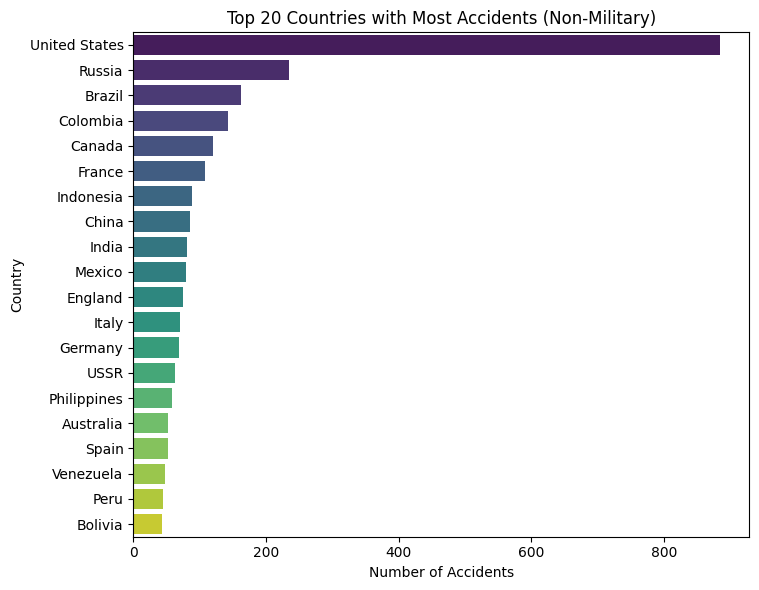

In [35]:
# Filter the dataset into non-military flights
non_military_accidents = air_accidents[air_accidents['IsMilitary'] == False]

# Calculate the number of accidents for each country in non-military flights
top_countries_non_military = non_military_accidents['LocationCountry'].value_counts().head(20)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.barplot(y=top_countries_non_military.index, x=top_countries_non_military.values, palette='viridis')
plt.title('Top 20 Countries with Most Accidents (Non-Military)')
plt.xlabel('Number of Accidents')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

Top 20 Countries with Most Accidents (Military)

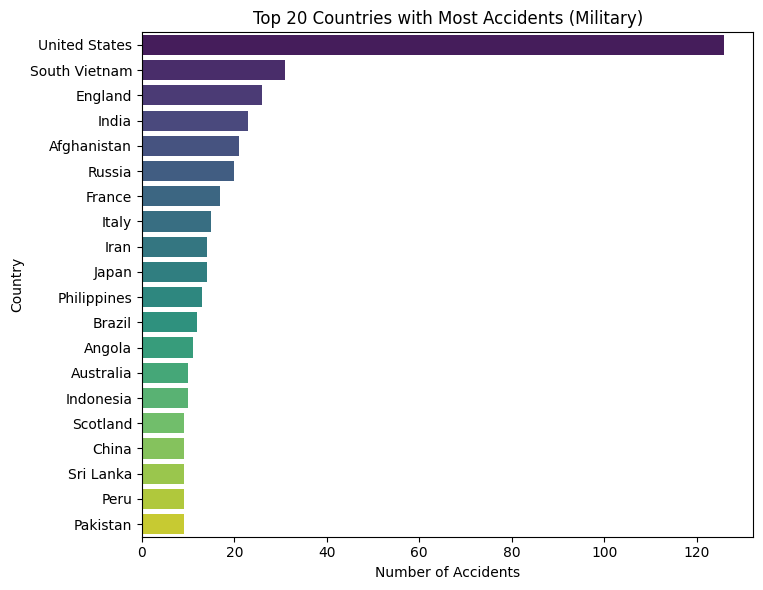

In [36]:
# Filter the dataset into military flights
military_accidents = air_accidents[air_accidents['IsMilitary'] == True]

# Calculate the number of accidents for each country in military flights
top_countries_military = military_accidents['LocationCountry'].value_counts().head(20)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(y=top_countries_military.index, x=top_countries_military.values, palette='viridis')
plt.title('Top 20 Countries with Most Accidents (Military)')
plt.xlabel('Number of Accidents')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

## CREW FATALITY RATE REDUCTION BY DECADE - KPI

Crew Fatalities Per Year

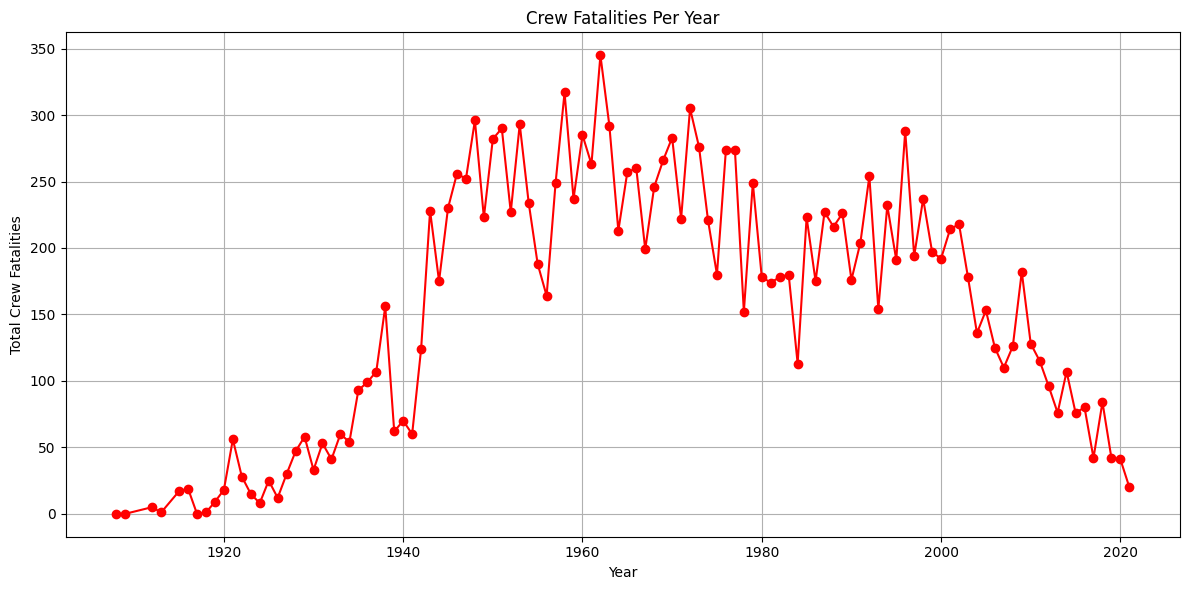

In [37]:
# Group the data by year and calculate total crew fatalities for each year
crew_fatalities_by_year = air_accidents.groupby(air_accidents['Date'].dt.year)['CrewFatalities'].sum()

# Create a line chart to show crew fatalities over the years
plt.figure(figsize=(12, 6))
plt.plot(crew_fatalities_by_year.index, crew_fatalities_by_year.values, marker='o', linestyle='-', color='red')
plt.title('Crew Fatalities Per Year')
plt.xlabel('Year')
plt.ylabel('Total Crew Fatalities')
plt.grid(True)
plt.tight_layout()
plt.show()

Crew Fatality Rate Per Year

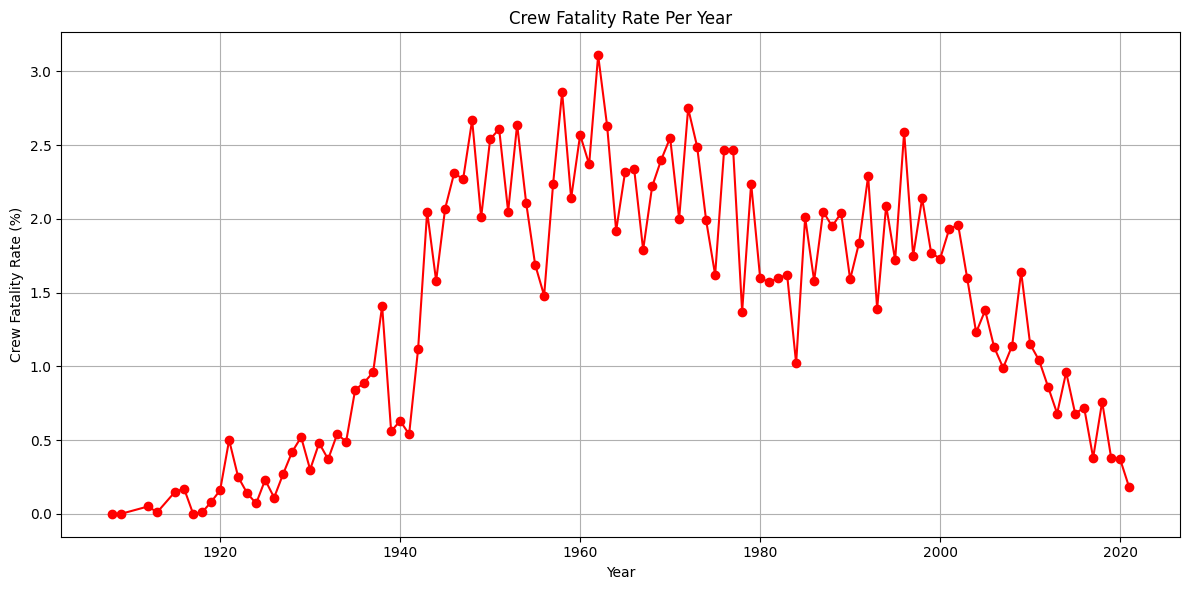

In [38]:
# Group the data by year and calculate total crew fatalities and crew on board for each year
crew_data_by_year = air_accidents.groupby(air_accidents['Date'].dt.year)[['CrewFatalities', 'CrewAboard']].sum()

# Calculate the fatality rate (percentage) for each year
crew_data_by_year['FatalityRate'] = round((crew_data_by_year['CrewFatalities'] / len(crew_data_by_year)), 2)

# Create a line chart to show the fatality rate over the years
plt.figure(figsize=(12, 6))
plt.plot(crew_data_by_year.index, crew_data_by_year['FatalityRate'], marker='o', linestyle='-', color='red')
plt.title('Crew Fatality Rate Per Year')
plt.xlabel('Year')
plt.ylabel('Crew Fatality Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

Crew Fatalities Comparison between 2002-2011 and 2012-2021

In [39]:
# Filter the dataset for the decade groups 2002-2011 and 2012-2021 using the new columns
data_2002_2011 = air_accidents[air_accidents['2002-2011']]
data_2012_2021 = air_accidents[air_accidents['2012-2021']]

# Calculate total crew fatalities and crew on board for each decade group
crew_fatalities_2002_2011 = data_2002_2011['CrewFatalities'].sum()
total_accidents_2002_2011 = len(data_2002_2011)
crew_fatalities_2012_2021 = data_2012_2021['CrewFatalities'].sum()
total_accidents_2012_2021 = len(data_2012_2021)

# Calculate the fatality rate (percentage) for each decade group
crew_fatality_rate_2002_2011 = round((crew_fatalities_2002_2011 / total_accidents_2002_2011), 2)
crew_fatality_rate_2012_2021 = round((crew_fatalities_2012_2021 / total_accidents_2012_2021), 2)

print(f"The Crew Fatality Rate between 2002 and 2011 is: {crew_fatality_rate_2002_2011}%")
print(f"The Crew Fatality Rate between 2012 and 2021 is: {crew_fatality_rate_2012_2021}%")

The Crew Fatality Rate between 2002 and 2011 is: 3.18%
The Crew Fatality Rate between 2012 and 2021 is: 3.75%


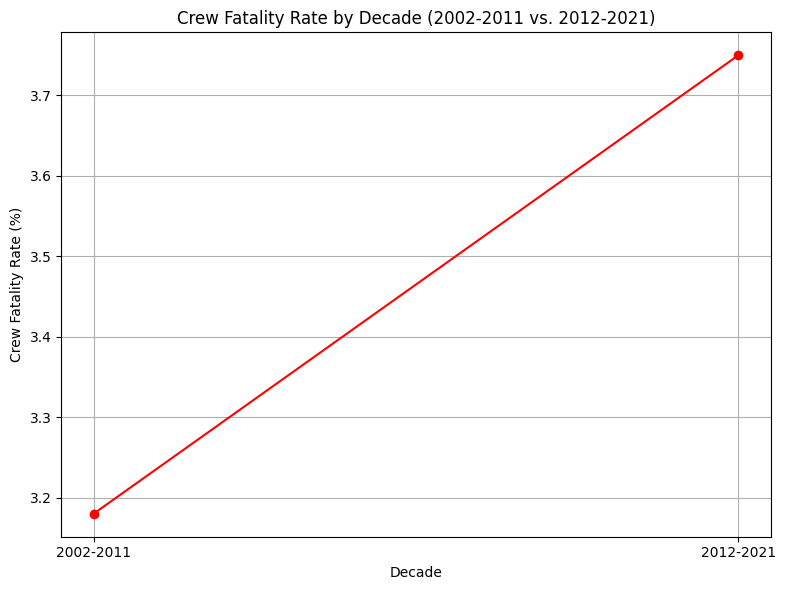

In [40]:
# Create a line chart to show the fatality rate for the decade groups
decades = ['2002-2011', '2012-2021']
fatality_rates = [crew_fatality_rate_2002_2011, crew_fatality_rate_2012_2021]

plt.figure(figsize=(8, 6))
plt.plot(decades, fatality_rates, marker='o', linestyle='-', color='red')
plt.title('Crew Fatality Rate by Decade (2002-2011 vs. 2012-2021)')
plt.xlabel('Decade')
plt.ylabel('Crew Fatality Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# Calculate the Crew Fatality Rate reduction percentage
percentage_reduction = round(((crew_fatality_rate_2002_2011 - crew_fatality_rate_2012_2021) / crew_fatality_rate_2002_2011) * 100, 2)

# Define the target reduction (10% reduction)
target_reduction = 10

# Check if the reduction meets the target
kpi_met = percentage_reduction >= target_reduction

print(f"Crew Fatality Rate Reduction: {percentage_reduction:.2f}%")
print(f"KPI Met (10% Reduction Target): {kpi_met}")

Crew Fatality Rate Reduction: -17.92%
KPI Met (10% Reduction Target): False


## HIJACKING INCIDENTS IN AVIATION ACCIDENTS - KPI

In [42]:
air_accidents['Hijack'] = air_accidents['Summary'].str.contains('hijack', case=False)

In [43]:
# Count the total number of aviation accidents involving hijacked planes
total_accidents_involving_hijack = air_accidents['Hijack'].sum()

print(total_accidents_involving_hijack)

35


Hijack incidents per year

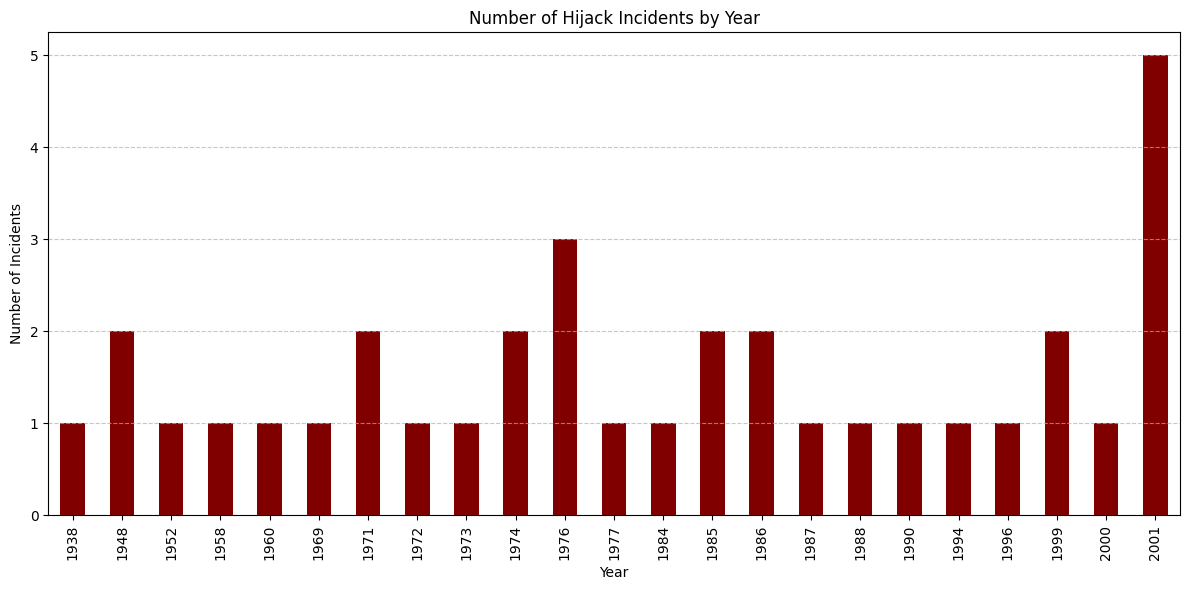

In [44]:
# Extract the year and create a new 'Year' column
air_accidents['Year'] = air_accidents['Date'].dt.year

# Filter the dataset to include only hijack incidents
hijack_incidents = air_accidents[air_accidents['Hijack']]

# Group by year and count the number of hijack incidents
hijack_incidents_by_year = hijack_incidents.groupby('Year')['Hijack'].count()

# Create a bar chart
plt.figure(figsize=(12, 6))
hijack_incidents_by_year.plot(kind='bar', color='maroon')
plt.title('Number of Hijack Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Hijack incidents per decade

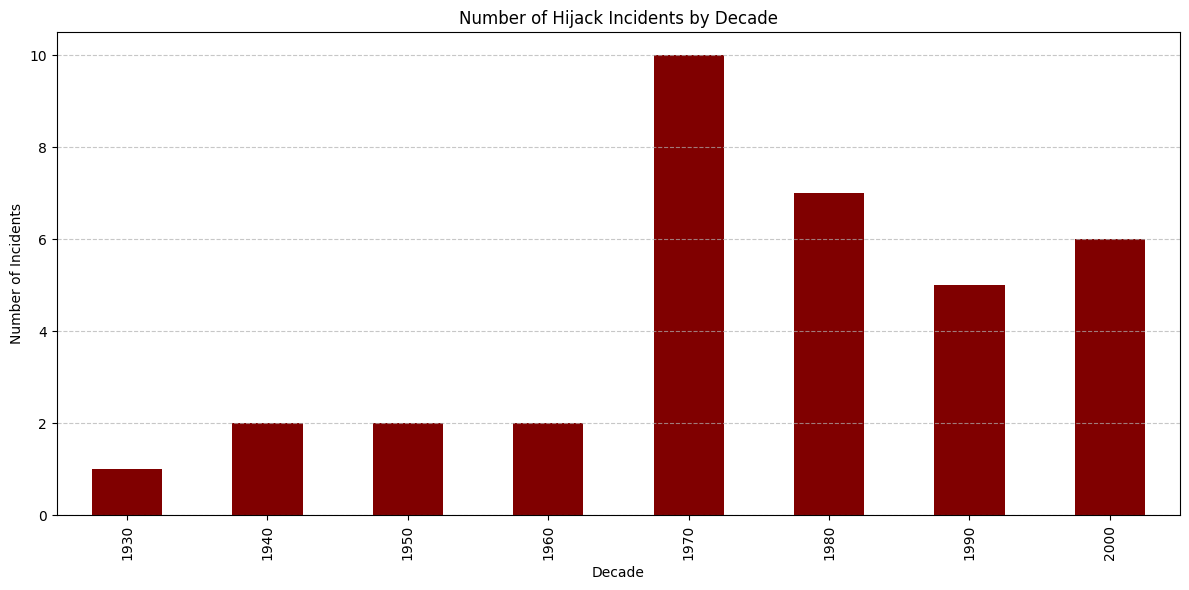

In [45]:
air_accidents['Year'] = air_accidents['Date'].dt.year
air_accidents['Decade'] = (air_accidents['Date'].dt.year // 10) * 10

# Count the total number of incidents for each decade
hijack_incidents_by_decade = hijack_incidents.groupby(air_accidents['Decade']).size()

plt.figure(figsize=(12, 6))
hijack_incidents_by_decade.plot(kind='bar', color='maroon')
plt.title('Number of Hijack Incidents by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Hijack incidents per operator

In [46]:
hijacking_operators = hijack_incidents['Operator'].value_counts()
print(hijacking_operators)

Operator
Air France                                   3
Philippine Air Lines                         3
Pan American World Airways                   2
American Airlines                            2
United Air Lines                             2
Cubana de Aviacion                           2
TAME Ecuador                                 1
Iraqi Airways                                1
Cathay Pacific Airways                       1
Vnukovo Airlines                             1
Indian Airlines                              1
All Nippon Airways                           1
Ethiopian Airlines                           1
China Southern Airlines / Xiamen Airlines    1
Kuwait Airways                               1
Air Afrique                                  1
EgyptAir                                     1
Korean Airlines                              1
Trans World Airlines                         1
Military - Ethiopian Air Force               1
Cathy Pacific                                1
Air 

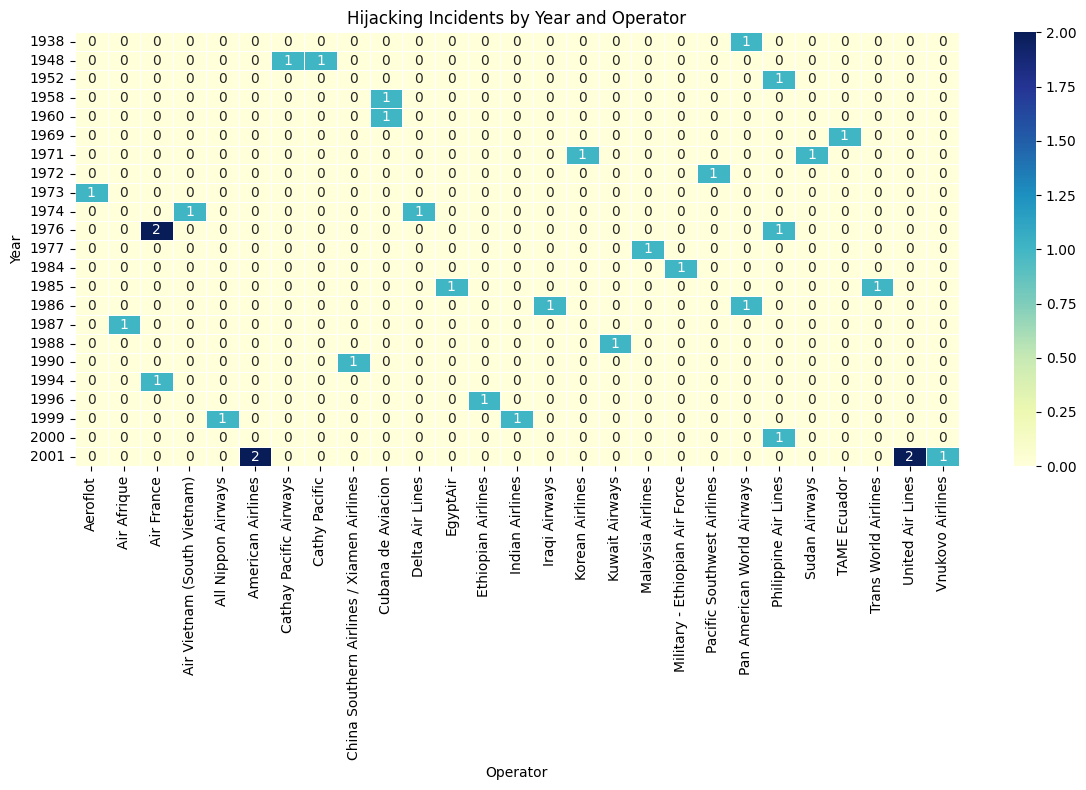

In [47]:
# Pivot the data to create a pivot table
pivot_table = hijack_incidents.pivot_table(index='Year', columns='Operator', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar=True)
plt.title('Hijacking Incidents by Year and Operator')
plt.xlabel('Operator')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

In [48]:
total_accidents_by_decade = air_accidents.groupby(air_accidents['Decade']).size()

# Calculate the Hijacking Incident Rate for each decade
hijacking_incident_rate_by_decade = (hijack_incidents_by_decade / total_accidents_by_decade) * 100

# Display the results
print(hijacking_incident_rate_by_decade)

Decade
1900         NaN
1910         NaN
1920         NaN
1930    0.277778
1940    0.344828
1950    0.306748
1960    0.310078
1970    1.633987
1980    1.265823
1990    0.792393
2000    1.183432
2010         NaN
2020         NaN
dtype: float64


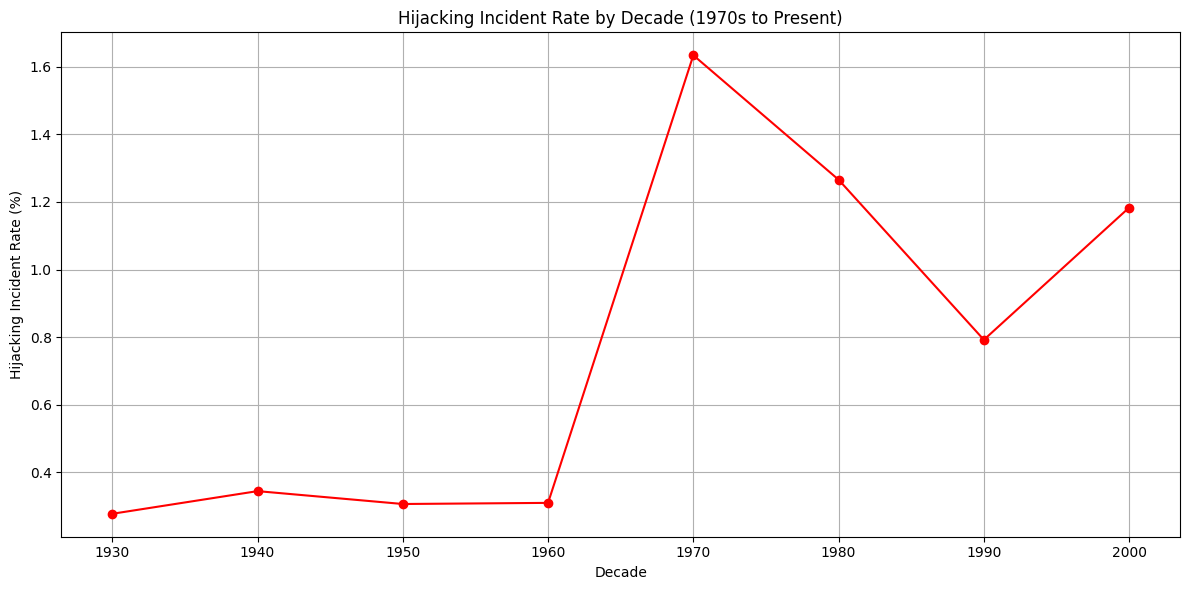

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(hijacking_incident_rate_by_decade.index, hijacking_incident_rate_by_decade.values, marker='o', linestyle='-', color='red')
plt.title('Hijacking Incident Rate by Decade (1970s to Present)')
plt.xlabel('Decade')
plt.ylabel('Hijacking Incident Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()